In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('spam.csv')

In [17]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2732,ham,How dare you stupid. I wont tell anything to y...,NaN,NaN,NaN
1089,ham,Goodmorning today i am late for &lt;DECIMAL&g...,NaN,NaN,NaN
1973,ham,I had askd u a question some hours before. Its...,NaN,NaN,NaN
915,ham,I could ask carlos if we could get more if any...,NaN,NaN,NaN
273,ham,"Usf I guess, might as well take 1 car",NaN,NaN,NaN


In [18]:
df.shape

(5572, 5)

In [19]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [22]:
df.sample(5)

,v1,v2
438,ham,"Hi hope u get this txt~journey hasnt been gd,n..."
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...
4895,ham,2 and half years i missed your friendship:-)
232,ham,"Sorry battery died, yeah I'm here"
4025,ham,Oh ok.. Wat's ur email?


In [23]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
4730,ham,K:)eng rocking in ashes:)
3223,ham,Sorry da thangam.it's my mistake.
2433,ham,Indians r poor but India is not a poor country...
2648,ham,"Hi, can i please get a &lt;#&gt; dollar loan..."
32,ham,K tell me anything about you.


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
# check for duplicate values
df.duplicated().sum()


403

In [29]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

## EDA

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

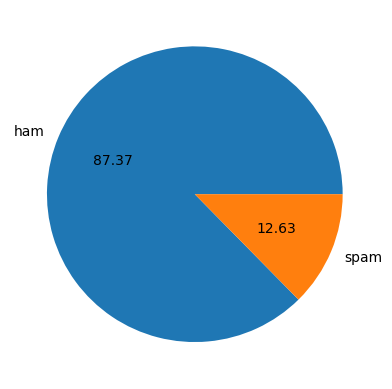

In [34]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
# Data is imbalanced

In [36]:
import nltk

In [37]:
!pip install nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['num_characters'] = df['text'].apply(len)

In [40]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [48]:
import seaborn as sns

C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

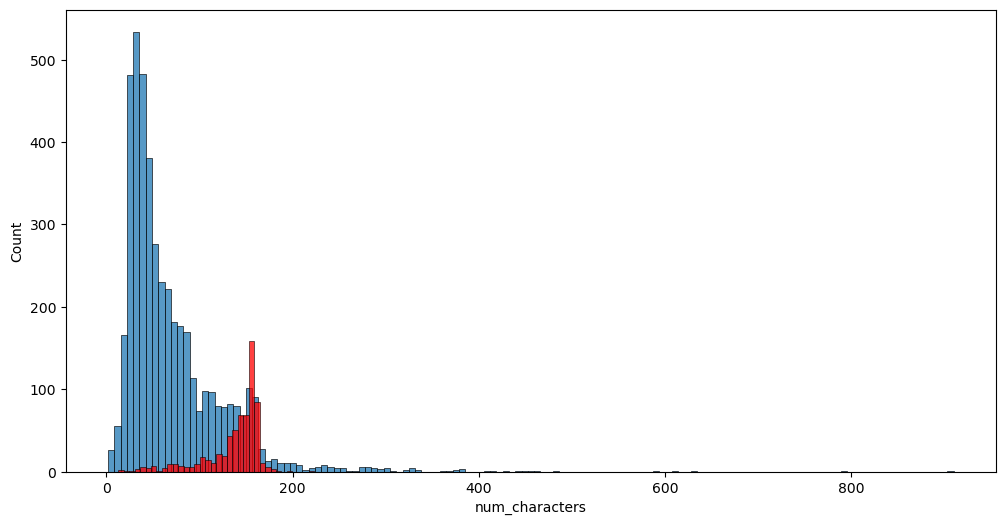

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

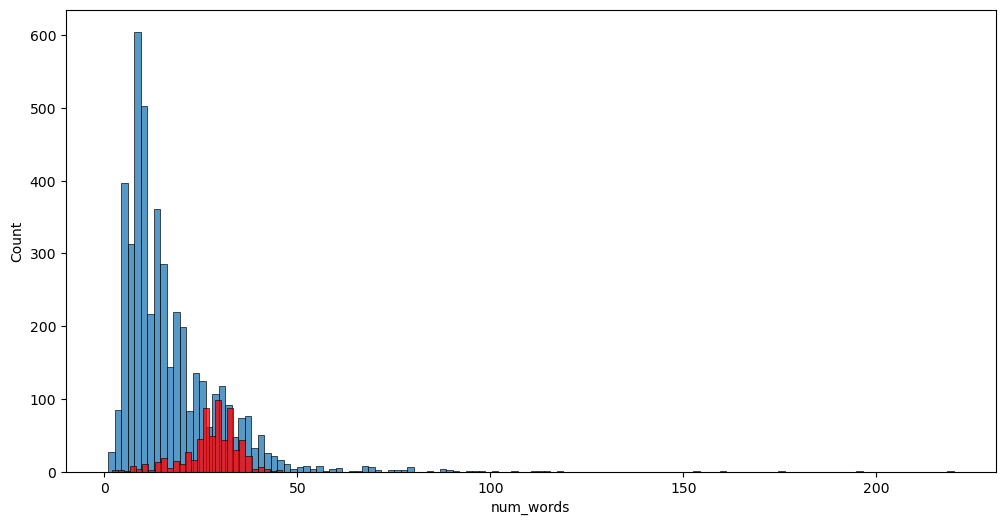

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


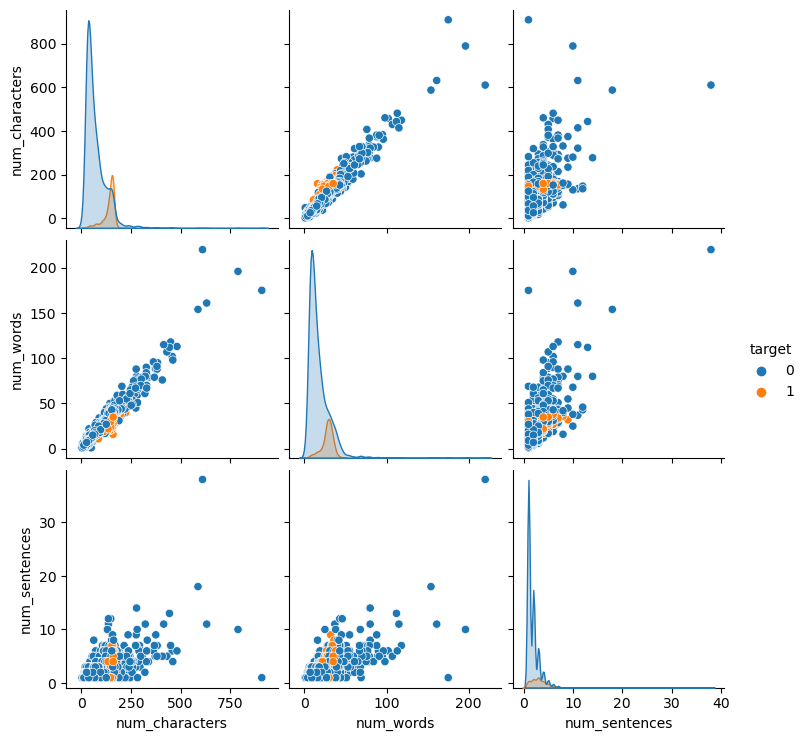

In [51]:
sns.pairplot(df,hue='target')

## 3. Data Processing
1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.Stemming

In [52]:
# Downloading all the stopwords for the further use...
import nltk
nltk.download('stopwords') # Through this command we downloaded all the stopwords and now we will see what are those stopwords!

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# from nltk.corpus imported stopwords library for further use in removing all the stopwords using transform_text function!
from nltk.corpus import stopwords
stopwords.words('english') # In this instruction we have displayed all the stopwords! for demo!transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
# Imported String library for for further use in removing all the punctuations using the transform_text function!
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
# Now lastly we are left with stemming in the data preprocessing...
# Hence, importing this module/library to apply stemming in data using the transform_text function!
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Singing') # It will remove the "ing" part of the text...now we will apply the same logic in that transform_text function!

'sing'

In [56]:
# Creating a function to convert all the characters of the msg into lower case and then tokenize it (means the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens)!
def transform_text(text) :
    # Step 1 : Converting Texts to lower case
    text = text.lower()
    text = nltk.word_tokenize(text) # Tokenization

    # Step 2 : Tokenization and removing all the special characters
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    
    # Step 3 : Remvoving all the stopwords and punctuations
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [57]:
# Example 1 to show the usage of the transform_text() function...
transform_text('Hi My name is Samradhi Singh and I am 20% Years Old') # just an example to show the use of the tranform_text function's use! as it will conver the whol.e text into lower case and then tokenize it and then append them into the string!

'hi name samradhi singh 20 year old'

In [58]:
# Example 2 to show the usage of the transform_text() function...
transform_text('This is my project of SMS Spam Detection, in Machine learning!')
# As we can see that the transform_text functiom converted all the text into lower case and then it removed all the punctuations, tokenized all the elements, removed all the stopwords!

'project sm spam detect machin learn'

In [59]:
# Example 2 to show the usage of the transform_text() function after applying all the processing upto stemming...
transform_text('This is my Project on SMS Spam Detection, in Machine learning!')

'project sm spam detect machin learn'

In [62]:
df['transformed_text'] = df['text'].apply(transform_text)

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
# Now we will generate a word cloud for the preprocessed data! for Spam Msgs!
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

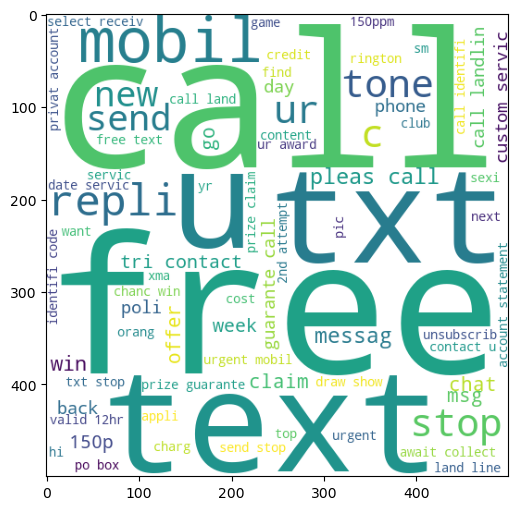

In [68]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [69]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

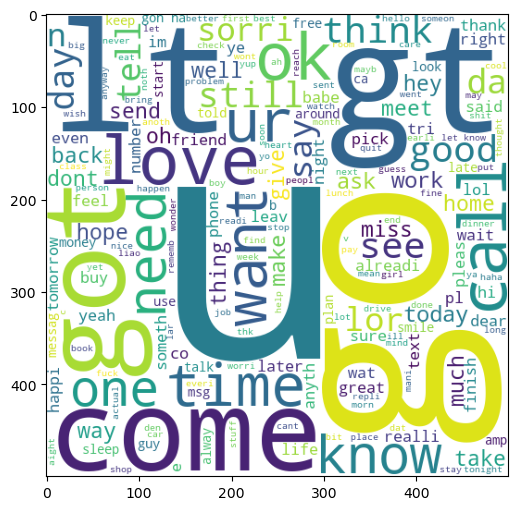

In [71]:

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [72]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [74]:
len(spam_corpus)

9941

In [76]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [77]:
len(ham_corpus)

35305

In [78]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [82]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [83]:

X.shape

(5169, 3000)

In [84]:
y = df['target'].values

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [90]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [91]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [92]:
# tfidf --> MNB


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [95]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [96]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [97]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [99]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [100]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.974855,0.982759
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
10,xgb,0.968085,0.941176
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231


In [101]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [102]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.968085
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.959381


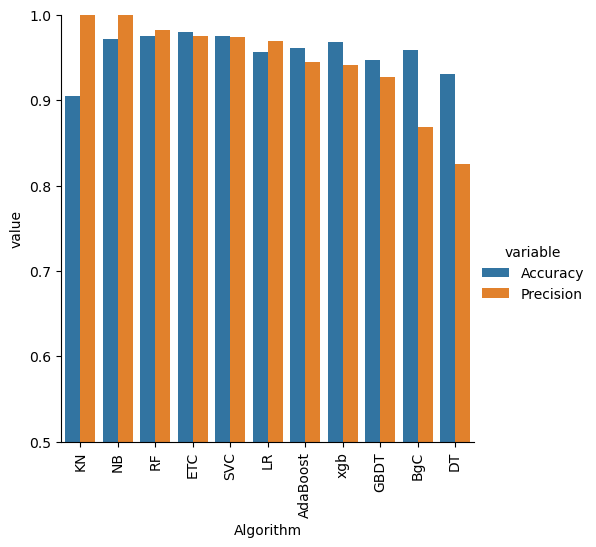

In [103]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [109]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [110]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [112]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
6,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
7,xgb,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176
8,GBDT,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835
9,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231


In [113]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [114]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [115]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [116]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [117]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [118]:
from sklearn.ensemble import StackingClassifier

In [119]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [120]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [121]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [122]:
import pickle 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1","Sample text 2","Sample text 3"]
y_train = [0,1,0] 

tfidf = TfidfVectorizer(lowercase= True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb, model_file)
